In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#한글설정
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings(action='ignore')

In [9]:
df = pd.read_csv('df_std.csv',encoding='cp949')
df_raw = df.copy()
df.rename(columns={'pa':'경찰서접근성','ep':'노령인구','fp':'여성인구','yp':'유소년인구','light':'가로등','nb':'노후건물'},inplace=True)
df.drop(columns='cctv',inplace=True)
df.head()

,경찰서접근성,노령인구,여성인구,유소년인구,가로등,노후건물,gid
0,0.757896,0.238218,0.178516,0.0,0.592419,0.250172,ㅼㅤㄱㅝㅀ58ab30ba
1,0.749224,0.000000,0.000000,0.0,0.735251,0.250172,ㅼㅤㄱㅝㅀ58bb30ab
2,0.749224,0.000000,0.000000,0.0,0.655714,0.250172,ㅼㅤㄱㅝㅀ59aa30aa
3,0.749224,0.000000,0.000000,0.0,0.628545,0.320499,ㅼㅤㄱㅝㅀ59aa30ab
4,0.727538,0.000000,0.000000,0.0,0.539505,0.363463,ㅼㅤㄱㅝㅀ59ab30aa


In [71]:
df_no=df[df['pop'].notnull()]
df_raw = df_no.reset_index()
df_no.drop(columns=['pop','gid'],inplace=True)
df_no.fillna(0,inplace=True)
print(len(df_no))
df_no.head()

1081


,pa,ep,fp,yp,cctv,light,nb
5,8.150,6.0,7.0,0.0,0,3,1
17,7.768,0.0,0.0,0.0,0,10,1
26,7.768,0.0,0.0,0.0,0,5,1
27,7.768,0.0,0.0,0.0,0,4,2
42,6.890,0.0,0.0,0.0,1,2,3


In [72]:
df_raw.head()

,index,gid,pa,ep,fp,yp,cctv,light,pop,nb
0,5,ㅼ궗58ab30ba,8.150,6.0,7.0,0.0,0,3,15.0,1
1,17,ㅼ궗58bb30ab,7.768,0.0,0.0,NaN,0,10,8.0,1
2,26,ㅼ궗59aa30aa,7.768,0.0,0.0,NaN,0,5,6.0,1
3,27,ㅼ궗59aa30ab,7.768,0.0,0.0,NaN,0,4,7.0,2
4,42,ㅼ궗59ab30aa,6.890,0.0,0.0,NaN,1,2,6.0,3


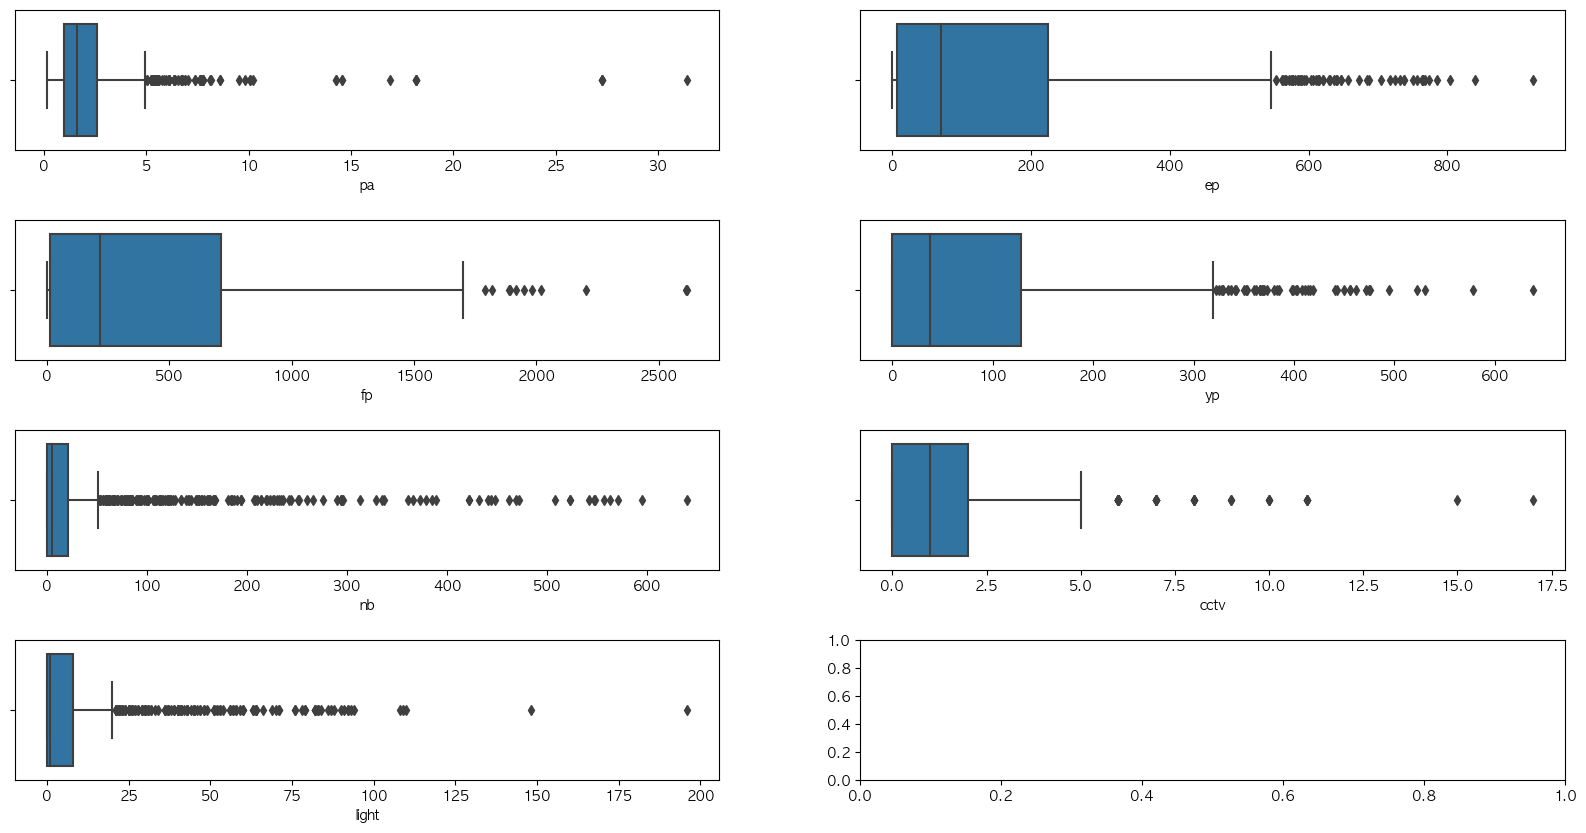

In [28]:
fig, ax = plt.subplots(ncols=2,nrows=4,figsize=(20,10))
fig.subplots_adjust(hspace=.5)

sns.boxplot(data=df_no,x='pa',ax=ax[0,0])
sns.boxplot(data=df_no,x='ep',ax=ax[0,1])
sns.boxplot(data=df_no,x='fp',ax=ax[1,0])
sns.boxplot(data=df_no,x='yp',ax=ax[1,1])
sns.boxplot(data=df_no,x='nb',ax=ax[2,0])
sns.boxplot(data=df_no,x='cctv',ax=ax[2,1])
sns.boxplot(data=df_no,x='light',ax=ax[3,0])

plt.show()

<AxesSubplot: >

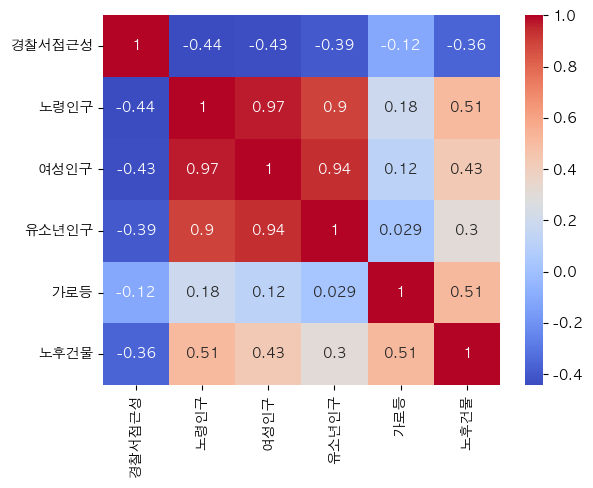

In [10]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [74]:
# 0이 존재하는 열만 0.1 추가하여 boxplot 변환 진행
df_no[['ep','fp','yp','cctv','light','nb']] = df_no[['ep','fp','yp','cctv','light','nb']] + 0.1

In [62]:
df_no

,pa,ep,fp,yp,cctv,light,nb
5,8.150,6.1,7.1,0.1,0.1,3.1,1.1
17,7.768,0.1,0.1,0.1,0.1,10.1,1.1
26,7.768,0.1,0.1,0.1,0.1,5.1,1.1
27,7.768,0.1,0.1,0.1,0.1,4.1,2.1
42,6.890,0.1,0.1,0.1,1.1,2.1,3.1
...,...,...,...,...,...,...,...
2310,2.050,0.1,0.1,0.1,0.1,0.1,1.1
2312,2.050,82.1,230.1,54.1,2.1,3.1,2.1
2313,1.668,51.1,93.1,14.1,0.1,7.1,15.1
2314,1.434,19.1,50.1,8.1,4.1,2.1,5.1


In [75]:
from scipy import stats
# Box-Cox 변환 적용
for i in enumerate(df_no.columns):
    df_no[i[1]], lambda_value = stats.boxcox(df_no[i[1]])
df_no

,pa,ep,fp,yp,cctv,light,nb
5,2.075419,2.194656,2.473536,-1.934197,-2.584372,1.040737,0.095435
17,2.028432,-1.830226,-1.789793,-1.934197,-2.584372,1.954559,0.095435
26,2.028432,-1.830226,-1.789793,-1.934197,-2.584372,1.445693,0.095435
27,2.028432,-1.830226,-1.789793,-1.934197,-2.584372,1.271870,0.749537
42,1.910934,-1.830226,-1.789793,-1.934197,0.094865,0.702201,1.149137
...,...,...,...,...,...,...,...
2310,0.715182,-1.830226,-1.789793,-1.934197,-2.584372,-2.749478,0.095435
2312,0.715182,7.212462,10.799987,5.537841,0.715496,1.040737,0.749537
2313,0.510274,6.084521,7.962647,3.276413,-2.584372,1.698593,2.818301
2314,0.359797,4.069770,6.332159,2.473824,1.317397,0.702201,1.666186


<AxesSubplot: >

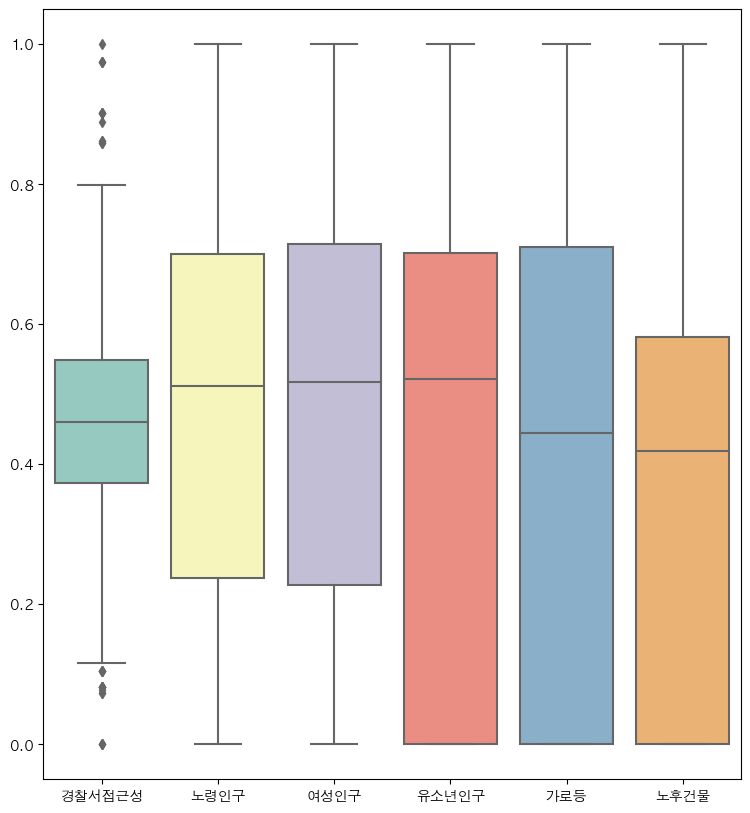

In [26]:
plt.figure(figsize=(9,10))
sns.boxplot(df,palette = "Set3")

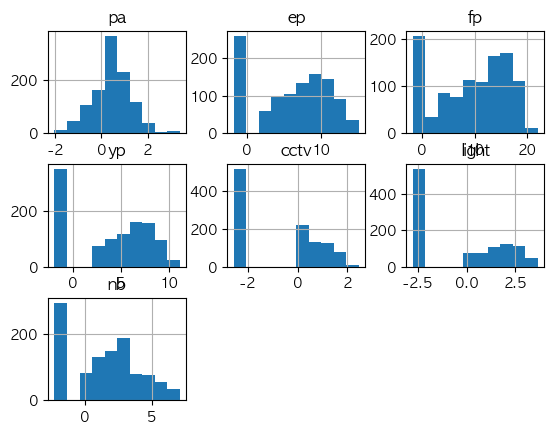

In [50]:
df_no.hist()
plt.show()

In [77]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 준비
# df_scaled = df_no[['ep','fp','yp','cctv','light','nb']]

# Min-Max Scaling 적용
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_no)

df_std = pd.DataFrame(scaled_data, columns=['pa','ep','fp','yp','cctv','light','nb'])

In [78]:
df_std['gid']=df_raw['gid']

In [79]:
df_std

,pa,ep,fp,yp,cctv,light,nb,gid
0,0.757896,0.238218,0.178516,0.000000,0.000000,0.592419,0.250172,ㅼ궗58ab30ba
1,0.749224,0.000000,0.000000,0.000000,0.000000,0.735251,0.250172,ㅼ궗58bb30ab
2,0.749224,0.000000,0.000000,0.000000,0.000000,0.655714,0.250172,ㅼ궗59aa30aa
3,0.749224,0.000000,0.000000,0.000000,0.000000,0.628545,0.320499,ㅼ궗59aa30ab
4,0.727538,0.000000,0.000000,0.000000,0.529358,0.539505,0.363463,ㅼ궗59ab30aa
...,...,...,...,...,...,...,...,...
1076,0.506843,0.000000,0.000000,0.000000,0.000000,0.000000,0.250172,ㅼ궗71bb37ba
1077,0.506843,0.535203,0.527165,0.571053,0.651981,0.592419,0.320499,ㅼ궗71bb38aa
1078,0.469024,0.468444,0.408359,0.398223,0.000000,0.695243,0.542926,ㅼ궗71bb38ab
1079,0.441251,0.349199,0.340086,0.336884,0.770903,0.539505,0.419054,ㅼ궗71bb38ba


In [81]:
df_std.to_csv('df_std.csv',encoding='euc-kr',index=False)